In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
df = pd.read_csv('c://bd092_data/BankPersonalLoan.csv')
df.head()
df.drop(['ID', 'Experience', 'ZIP Code'], axis=1, inplace=True)
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
df.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [20]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [26]:
tree_m = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
tree_m.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
y_pred = tree_m.predict(x_test) # 새 데이터 넣어서 이 모델 성능이 얼마나 좋은지 검증해보자. 
tree_m.score(x_test, y_test) #tree_m 모델 정확도는 0.9806이다. 

0.9806666666666667

In [32]:
# 정오표로 정확도 검증하는 방법 
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat

,0,1
0,1344,12
1,17,127


In [33]:
# 정오표 내용들을 좀 더 한 눈에 보자. 
print('오분류 갯수 : %d' %(y_test != y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f_score : %.3f' %f1_score(y_test,y_pred))

오분류 갯수 : 29
정확도 : 0.981
f_score : 0.898


In [40]:
#최적화로 모델 예측 정확도를 더 끌어올려 보자. 
#최적화 하기1 - 어떤 옵션들 있는지 찾기 

from sklearn.pipeline import make_pipeline, Pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier())
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [49]:
#최적화 하기2 - 옵션 찾았다. 이제 '옵션의 어떤 지점에서 모델 예측 정확도가 제일 커지는지 찾기'
#교차타당성 검증으로 모델 예측 정확도 최대 되는 지점 찾는다. 
#교차타당성_검증은_GridSearchCV함수_이용하기 
from sklearn.model_selection import GridSearchCV
param_range1 = range(1,11)
param_range2 = range(5,26,5)

param_grid = [{'decisiontreeclassifier__max_depth' : param_range1,
              'decisiontreeclassifier__min_samples_leaf' : param_range2}]

clf_cv = GridSearchCV(estimator = pipe_tree,
            param_grid = param_grid,
            scoring = 'accuracy',
            n_jobs= -1,
            cv=10)
clf_cv.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__max_depth': range(1, 11),
                          'decisiontreeclassifier__min_samples_leaf': range(5, 26, 5)}],
             scoring='accuracy')

In [50]:
print(clf_cv.best_score_)
print(clf_cv.best_params_)

0.9848571428571429
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10}


In [52]:
tree_m_new = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=10, random_state=1)
tree_m_new.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)

In [54]:
y_pred = tree_m_new.predict(x_test)
tree_m_new.score(x_test, y_test)

0.9806666666666667

In [57]:
# 정오분류표 보기 
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confmat

,0,1
0,1346,10
1,19,125


In [58]:
print('오분류 갯수 : %d' %(y_test != y_pred).sum())
print('정확도 : %.3f' %accuracy_score(y_test, y_pred))
print('f score : %.3f' %f1_score(y_test, y_pred))

오분류 갯수 : 29
정확도 : 0.981
f score : 0.896


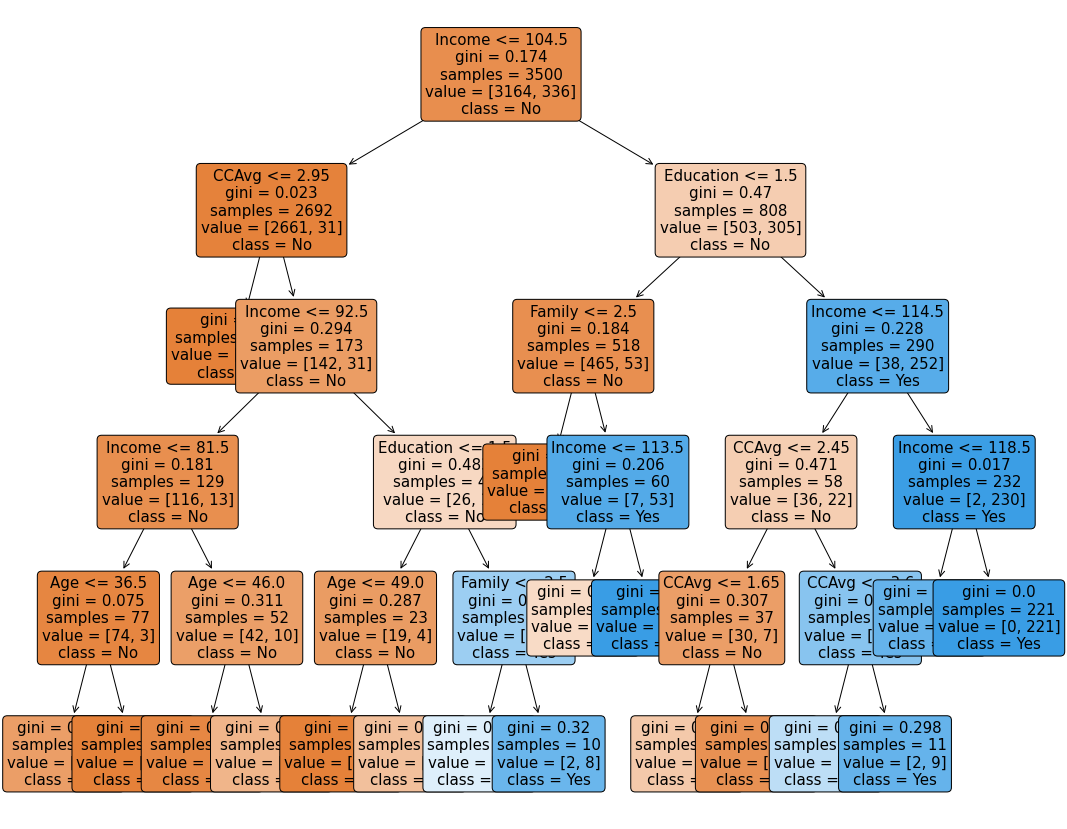

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_name = x.columns.tolist()
target_name = np.array(['No', 'Yes'])

plt.figure(figsize=(18,15))

tree = plot_tree(tree_m_new, 
                feature_names = feature_name, 
                class_names = target_name, 
                filled=True,
                rounded=True,
                fontsize=15)